# Super-resolution on semi-algebraic domains

In [1]:
using BLASSOLasserre

using DynamicPolynomials
using SemialgebraicSets

┌ Info: Recompiling stale cache file /home/rom1/.julia/compiled/v1.1/BLASSOLasserre/L3ejc.ji for BLASSOLasserre [6a49b68a-1168-11ea-1ad7-dbcee2d404eb]
└ @ Base loading.jl:1184


In [2]:
using Plots
using Plots.PlotMeasures
using PyPlot

pyplot()
PyPlot.matplotlib.rc("text", usetex=true)
PyPlot.matplotlib.rc("font", family="serif")
Plots.scalefontsizes(1.5)

┌ Info: Recompiling stale cache file /home/rom1/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/rom1/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


## Noiseless setting

### 1D example

Trying to recover $\mu=\delta_{-\frac{3}{4}}+\delta_{\frac{1}{2}}-\delta_{\frac{1}{8}}$

In [3]:
locations = [[-3/4], [1/2], [1/8]]
amplitudes = [1, 1, -1]

@polyvar x[1:1]
domain = @set - (x[1] + 1) * (x[1] + 1/2) * x[1] * (x[1] - 1) >= 0

d = 10
ϵ = 1e-3;

In [4]:
objvalue, μ, dualcertif = example(x, locations, amplitudes, domain, d, ϵ);

In [5]:
println("Objective value : ")
println(objvalue)

Objective value : 
2.99999976439301


The objective value is almost equal to $||\mu||_{\text{TV}}$

In [6]:
println("Optimal measure : ")
show(μ)

Optimal measure : 
Atomic measure on the variables x[1] with 3 atoms:
 at [-0.75] with weight 1.000000235867674
 at [0.5] with weight 0.9999996308415826
 at [0.125] with weight -0.999999863686624

$\mu$ is recovered with good precison

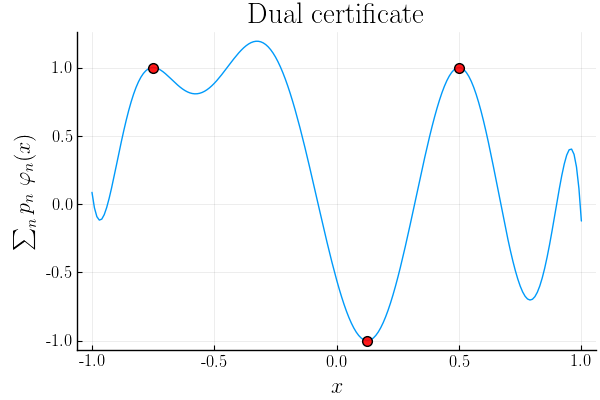

In [7]:
x_tab = -1:0.01:1
y_tab = [dualcertif([x_tab[i]]) for i=1:length(x_tab)]

Plots.plot(x_tab, y_tab, legend=false, left_margin=5mm)
plot!(title="Dual certificate", xlabel=L"$x$", ylabel=L"$\sum_n p_n~\varphi_n(x)$")

scatter!([atom.center for atom in μ.atoms], [sign(atom.weight) for atom in μ.atoms]', 
         markersize = 7, markeralpha = 0.9, markercolor = :red, legend=false)

The figure above shows the dual certificate $\sum_n p_n~\varphi_n(x)$  (it takes values greater than 1 only on a subset of $[-1,1]$ which does not belong to the domain defined above)

### 2D example

In [3]:
locations = [[-1/2, 1/2], [1/2, -1/2], [1/2, 1/2], [0, 0], [0, -1/2], [1/2, 0]]
amplitudes = [1, 1, 1, 1, -1, -1]

@polyvar x[1:2]
domain = @set 1 - x[1]^2 >= 0 && 1 - x[2]^2 >= 0

d = 12
ϵ = 1e-3;

In [4]:
objvalue, μ, dualcertif = example(x, locations, amplitudes, domain, d, ϵ);

In [5]:
println("Objective value : ", objvalue)

Objective value : 5.999999806740973


The objective value is almost equal to $||\mu||_{\text{TV}}$

In [6]:
println("Optimal measure : ")
show(μ)

Optimal measure : 
Atomic measure on the variables x[1], x[2] with 6 atoms:
 at [0.5, -0.5] with weight 0.9999992171017815
 at [0.5, 0.5] with weight 1.0000006573243876
 at [-0.5, 0.5] with weight 0.9999995203074312
 at [-6.73912e-7, 4.94936e-7] with weight 1.000000504886158
 at [-1.68676e-7, -0.5] with weight -1.000000953177225
 at [0.500001, 6.38217e-7] with weight -0.9999988853000887

$\mu$ is recovered with good precision

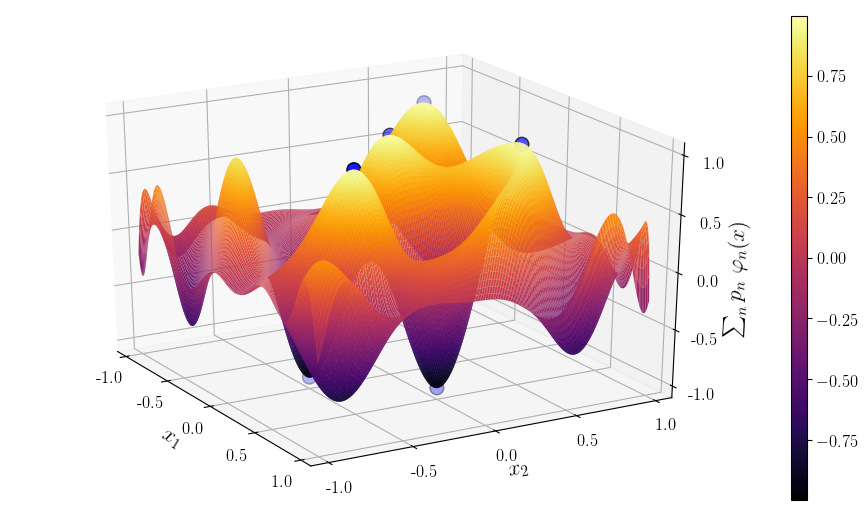

In [14]:
x_tab, y_tab = -1:0.01:1, -1:0.01:1
z_tab = Surface((abs,ord) -> dualcertif([abs, ord]), x_tab, y_tab)

surface(x_tab, y_tab, z_tab, linealpha = 0.3, camera=(60,25), show=true)
plot!(xlabel=L"$x_1$", ylabel=L"$x_2$", 
      zlabel=L"$\sum_n p_n~\varphi_n(x)$")

scatter!([atom.center[1] for atom in μ.atoms], [atom.center[2] for atom in μ.atoms],
         [sign(atom.weight) for atom in μ.atoms], markersize = 10, markeralpha = 0.9, 
         markercolor = :blue, legend=false)

plot!(size=(850, 500), right_margin=10mm);

The figure above shows the dual certificate $\sum_n p_n~\varphi_n(x)$

## Noisy setting

### 1D example

In [13]:
σ = 1e-4
λ = σ;

In [14]:
locations = [[-3/4], [1/2], [1/8]]
amplitudes = [1, 1, -1]

@polyvar x[1:1]
domain = @set - (x[1] + 1) * (x[1] + 1/2) * x[1] * (x[1] - 1) >= 0

d = 15
ϵ = 1e-3;

In [15]:
objvalue, μ, dualcertif = example(x, locations, amplitudes, domain, d, ϵ, σ, λ);

In [16]:
println("Objective value : ", objvalue)

Objective value : 2.7617574132684632


In [17]:
println("Optimal measure : ")
show(μ)

Optimal measure : 
Atomic measure on the variables x[1] with 7 atoms:
 at [-0.757096] with weight 0.8703388080424983
 at [-0.670221] with weight 0.15151403405029218
 at [1.0] with weight 0.003261995505352697
 at [0.549832] with weight 0.8099325439544798
 at [-0.999999] with weight -0.00018706406928401158
 at [0.863333] with weight -0.022762718561756157
 at [0.0535687] with weight -0.8120016525178014

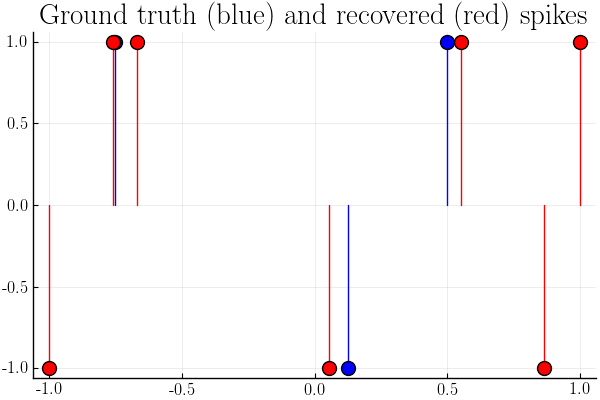

In [36]:
Plots.plot([x[1] for x in locations], amplitudes, line=:stem, marker=:circle, markersize=10, 
           color="blue", legend=false)

plot!([atom.center[1] for atom in μ.atoms], [sign(atom.weight) for atom in μ.atoms], 
      line=:stem, marker=:circle, markersize=10, color="red")

plot!(title="Ground truth (blue) and recovered (red) spikes")